In [2]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importamos el DATASET
data =  pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")


In [4]:
data

#Nuestro dataframe  contiene 13 columnas y 10 000 filas , siendo la columan "Churn" la varibale objetivo

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

#A simpple vista podemos observar que no tenemos  valores nulos
#y  ademas vemos que tenemos 3 columnas que son "object" : Surname , Geography , Gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
# vamos a ver si existen  usuarios duplicados
data.duplicated("CustomerId").sum()   # no hay duplciados

0

In [7]:
#establecemos el "CustomerId" como "Index"
data = data.set_index("CustomerId")
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


##Enconding

In [9]:
#mostramos la cantidad de datos para cada valor unico de la columna "Geography"
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
#como sabemos en modelo de ML no acepta valores string, lo que entiende son solamente numeros.
#por ello vamos reemplazar un valor para cada pais
data.replace({"Geography" : {"France":2 , "Germany" :1 , "Spain" :0}} ,  inplace =True)

In [11]:
#mostramos la cantidad de datos para cada valor unico de la columna "Gender"
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
data.replace({"Gender" : {"Male" :1 , "Female" :0}} , inplace = True)

In [13]:
#mostramos la cantidad de datos para cada valor unico de la columna "Num of Products"
data["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [14]:
#Observamos que la relacion entre la cantidad de datos por valor es significativa por ende
#vamos a asignar el valor de "0" , para las personas que tiene 1 producto  y "1" para los que tienen mas de 1 producto
data.replace({"Num Of Products" : { 1:0 , 2:1 ,  3:1  , 4:1}} , inplace = True)

In [15]:
data["Has Credit Card"].value_counts()


1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [16]:
data["Is Active Member"].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [17]:
#primero filtramos a las personas que tienen un valor de  "Balance" (saldo bancario) igual a  "0"
#en base a ello mostramos  la cantidad de valores para cada valor unico de "Churn"

# es decir hay 500 personas que  no tienen saldo bancario y ademas se retiraron o han abandonado el banco.
#por otro lado hay 3117 que no tienen saldo bancario y que todavia estan en el banco.
data.loc[(data["Balance"]==0) , "Churn"].value_counts()

#se filtró a las personas que tiene un valor de 0 en "Balance" ( saldo bancario) , ya que son las mas probables que dejen el banco


0    3117
1     500
Name: Churn, dtype: int64

In [18]:
#creamos una nueva columna de "balance"  en este caso
#será 1 para valores que tengan un "balance" >0
# y para un "Balance" == 0 su valor será "0"
data["new balance"] = np.where(data["Balance"] > 0 , 1 , 0)

In [19]:
data["new balance"].value_counts()
# es decir que hay 6383 personas que si tienen saldo
#3617  personas que no tienen saldo bancario

1    6383
0    3617
Name: new balance, dtype: int64

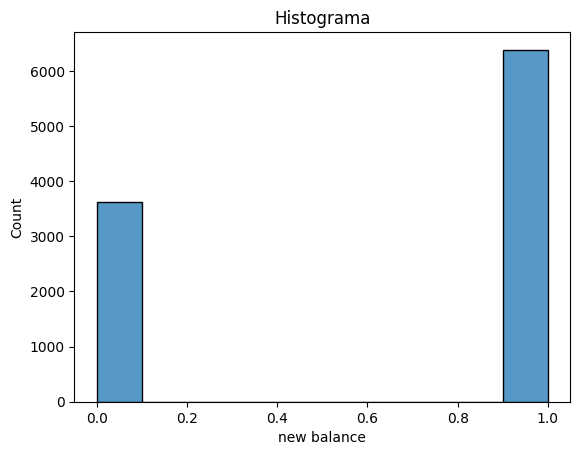

In [20]:
# Podemos observarlo en est histograma
sns.histplot(data=data, x="new balance", bins=10)  # 'bins' define la cantidad de contenedores del histograma

# Mostrar el histograma
plt.title('Histograma')

plt.show()

In [21]:
data.groupby(["Churn" , "Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  new balance  
Churn Geography                                 
0     0                      2064         2064  
      1                      1695         1695  
      2                      4204         4204  
1     0                       413          413  
      1                       814          814  
      2                       810          810

##Definimos las features y el target

In [22]:
#Primero vamos a ver todas las columnas de nuestro dataframe
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'new balance'],
      dtype='object')

In [23]:
# Para los features , eliminaremos "Surname" porque no brinda información relevante y "Churn" es el target.

X = data.drop(["Surname" , "Churn"] , axis = 1 )
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,new balance
CustomerId,,,,,,,,,,,
15634602,619,2,0,42,2,0.00,0,1,1,101348.88,0
15647311,608,0,0,41,1,83807.86,0,0,1,112542.58,1
15619304,502,2,0,42,8,159660.80,1,1,0,113931.57,1
15701354,699,2,0,39,1,0.00,1,0,0,93826.63,0
15737888,850,0,0,43,2,125510.82,0,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,2,1,39,5,0.00,1,1,0,96270.64,0
15569892,516,2,1,35,10,57369.61,0,1,1,101699.77,1
15584532,709,2,0,36,7,0.00,0,0,1,42085.58,0


In [24]:
y = data["Churn"]
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64

In [25]:
X.shape , y.shape

((10000, 11), (10000,))

## Tratamiento de Datos Desbalanceados

In [26]:
# Tenemos los datos de "Churn" desbalanceado
data["Churn"].value_counts()


#Undersampling (Submuestreo)

#Oversampling (Sobremuestreo)

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

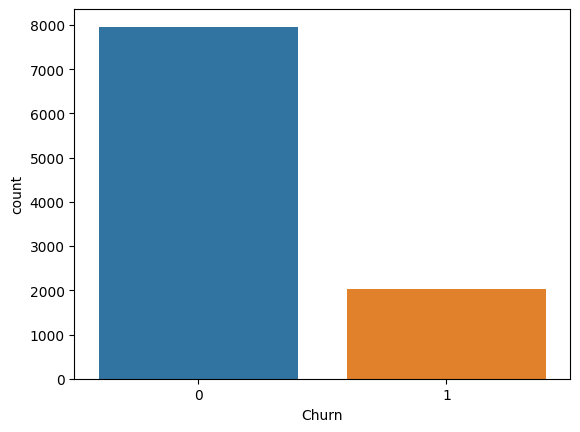

In [27]:
#veamoslo en un gráfico
sns.countplot(x = "Churn" , data  = data)

### Balanceo de datos por  UNDERSAMPLING (SUBMUESTREO)

In [28]:
#Random UnderSampling

from imblearn.under_sampling import RandomUnderSampler

In [52]:
rus = RandomUnderSampler(random_state= 100)

In [53]:
X_rus , y_rus = rus.fit_resample(X, y)

In [54]:
X_rus.shape  , y_rus.shape , X.shape , y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [55]:
#veamos los valores iniales del a columna Churn
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [56]:
#valores despues del undersampling
y_rus.value_counts()

#Ahora si están balanceados

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

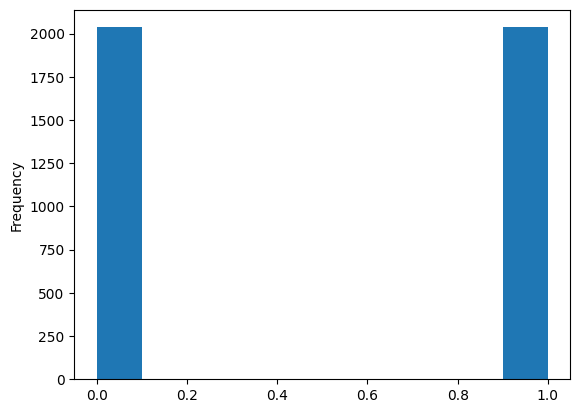

In [57]:
y_rus.plot(kind = "hist")

### Balanceo de datos por OVERSAMPLING (SOBREMUESTREO)

In [45]:
#Random OverSampling

from imblearn.over_sampling import RandomOverSampler

In [58]:
ros = RandomOverSampler(random_state= 100)

In [59]:
X_ros , y_ros = ros.fit_resample(X, y)

In [60]:
X_ros.shape  , y_ros.shape , X.shape , y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [61]:
#veamos los valores iniales del a columna Churn
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [62]:
#valores despues del undersampling
y_ros.value_counts()

#Ahora si están balanceados

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

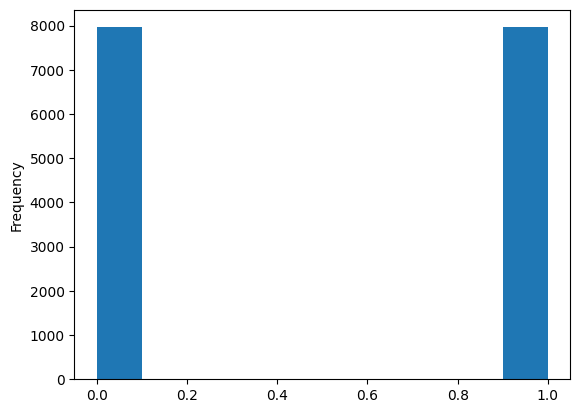

In [63]:
y_ros.plot(kind = "hist")

## Train Test Split - para cada caso de los conjuntos de datos

In [64]:
#importamos la libreria
from sklearn.model_selection import train_test_split

### Split de Datos originales

In [65]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 17)

### Split de datos con el balanceo por undersampling

In [66]:
X_train_rus , X_test_rus , y_train_rus , y_test_rus = train_test_split(X_rus , y_rus , test_size = 0.25 , random_state = 17)

### Split de datos con el balanceo por oversampling

In [67]:
X_train_ros , X_test_ros , y_train_ros , y_test_ros = train_test_split(X_ros , y_ros , test_size = 0.25 , random_state = 17)

## Estandarizar los Features

In [73]:
#importamos la libreria
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train.head()

### Estandarizando datos originales

In [74]:
X_train[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_train[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

In [76]:
X_test[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_test[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

### Estandarizando datos que tienen undersampling

In [77]:
X_train_rus[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_train_rus[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

In [78]:
X_test_rus[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_test_rus[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

### Estandarizando datos que tienen oversampling

In [79]:
X_train_ros[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_train_ros[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

In [80]:
X_test_ros[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]] = sc.fit_transform(X_test_ros[["CreditScore" , "Age" , "Tenure"  , "Balance" , "Estimated Salary"]])

## Clasificación por Support Vector Machine


## 1: Para los datos originales

In [81]:
from sklearn.svm  import SVC

In [82]:
svc  = SVC()

In [83]:
svc.fit(X_train , y_train)

SVC()

In [84]:
y_pred = svc.predict(X_test)

### Precisión del modelo

In [86]:
from sklearn.metrics import confusion_matrix , classification_report

In [87]:
confusion_matrix(y_test , y_pred)

array([[1948,   46],
       [ 387,  119]])

In [89]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1994
           1       0.72      0.24      0.35       506

    accuracy                           0.83      2500
   macro avg       0.78      0.61      0.63      2500
weighted avg       0.81      0.83      0.79      2500



### Ajustando los Hiperparámetros

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = { "C" :   [0.1 , 1 , 10] ,
            "gamma":   [1 , 0.1 , 0.01] ,
            "kernel":  ["rbf"] ,
            "class_weight": ["balanced"]
}

In [92]:
grid =GridSearchCV(SVC() , param_grid , refit= True , verbose =2 , cv = 2)
grid.fit(X_train , y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [93]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [94]:
grid_predictions = grid.predict(X_test)

In [95]:
confusion_matrix(y_test , grid_predictions)

array([[1695,  299],
       [ 233,  273]])

In [96]:
print(classification_report(y_test , grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1994
           1       0.48      0.54      0.51       506

    accuracy                           0.79      2500
   macro avg       0.68      0.69      0.69      2500
weighted avg       0.80      0.79      0.79      2500



## 2: Datos con Undersampling

In [97]:
svc_rus  = SVC()
svc_rus.fit(X_train_rus , y_train_rus)
y_pred_rus = svc_rus.predict(X_test_rus)

In [105]:
#precisión del modelo
confusion_matrix(y_test_rus , y_pred_rus)

array([[378, 122],
       [141, 378]])

In [99]:
print(classification_report(y_test_rus , y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       500
           1       0.76      0.73      0.74       519

    accuracy                           0.74      1019
   macro avg       0.74      0.74      0.74      1019
weighted avg       0.74      0.74      0.74      1019



In [106]:
#Ajustando los hiperparámetros
param_grid = { "C" :   [0.1 , 1 , 10] ,
            "gamma":   [1 , 0.1 , 0.01] ,
            "kernel":  ["rbf"] ,
            "class_weight": ["balanced"]
}

In [112]:
grid_rus = GridSearchCV(SVC() , param_grid , refit= True , verbose =2 , cv = 2)
grid_rus.fit(X_train_rus , y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [113]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [114]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [115]:
confusion_matrix(y_test_rus , grid_predictions_rus )

array([[381, 119],
       [141, 378]])

In [116]:
print(classification_report(y_test_rus , grid_predictions_rus ))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       500
           1       0.76      0.73      0.74       519

    accuracy                           0.74      1019
   macro avg       0.75      0.75      0.74      1019
weighted avg       0.75      0.74      0.74      1019



## 3: Datos con oversampling

In [102]:
svc_ros  = SVC()
svc_ros.fit(X_train_ros , y_train_ros)
y_pred_ros = svc_ros.predict(X_test_ros)

In [103]:
#precisión del modelo
confusion_matrix(y_test_ros , y_pred_ros)

array([[1539,  467],
       [ 449, 1527]])

In [104]:
print(classification_report(y_test_ros , y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2006
           1       0.77      0.77      0.77      1976

    accuracy                           0.77      3982
   macro avg       0.77      0.77      0.77      3982
weighted avg       0.77      0.77      0.77      3982



In [118]:
#Ajustando los hiperparámetros
param_grid = { "C" :   [0.1 , 1 , 10] ,
            "gamma":   [1 , 0.1 , 0.01] ,
            "kernel":  ["rbf"] ,
            "class_weight": ["balanced"]
}

In [119]:
grid_ros = GridSearchCV(SVC() , param_grid , refit= True , verbose =2 , cv = 2)
grid_ros.fit(X_train_ros , y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [124]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [125]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [126]:
confusion_matrix(y_test_ros , grid_predictions_ros )

array([[1737,  269],
       [  63, 1913]])

In [127]:
print(classification_report(y_test_ros , grid_predictions_ros ))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2006
           1       0.88      0.97      0.92      1976

    accuracy                           0.92      3982
   macro avg       0.92      0.92      0.92      3982
weighted avg       0.92      0.92      0.92      3982



Después del análisis del modelo de SVM para cada conjunto de dato s, al final obtenemos que  El modelo de SVM con oversampling es el mejor con un accuracy: 0.92